In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read the uploaded file
df = pd.read_csv("student_data.csv")

In [8]:
df.shape

(1977, 39)

In [10]:
def display_column_types(df):
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    print("Categorical Variables:")
    print(cat_cols, end="\n\n")

    print("Numerical Variables:")
    print(num_cols, end="\n\n")

    return cat_cols, num_cols

cat_cols, num_cols = display_column_types(df)

Categorical Variables:
['1. Age', '2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', '7. Did you receive a waiver or scholarship at your university?', 'Anxiety Label', 'Stress Label', 'Depression Label']

Numerical Variables:
['1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ', '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ', '3. In a semester, how often have you had trouble relaxing due to academic pressure? ', '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?', '5. In a semester, how often have you worried too much about academic affairs? ', '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?', '7. In a semester, how often have you felt afraid, as if something awful might happen?', 'Anxiety Value', '1. In a semester, how often have you felt upset due 

In [15]:
# Get numerical columns
numerical_data = df.select_dtypes(include='number')

# Display transposed summary statistics for numerical columns
numerical_data.describe().T


,count,mean,std,min,25%,50%,75%,max
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",1977.0,1.770359,0.951704,0.0,1.0,2.0,3.0,3.0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",1977.0,1.629236,1.028252,0.0,1.0,2.0,3.0,3.0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",1977.0,1.747092,0.996336,0.0,1.0,2.0,3.0,3.0
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",1977.0,1.777441,0.966041,0.0,1.0,2.0,3.0,3.0
"5. In a semester, how often have you worried too much about academic affairs?",1977.0,1.859383,0.982362,0.0,1.0,2.0,3.0,3.0
"6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?",1977.0,1.787557,0.993087,0.0,1.0,2.0,3.0,3.0
"7. In a semester, how often have you felt afraid, as if something awful might happen?",1977.0,1.719777,1.057735,0.0,1.0,2.0,3.0,3.0
Anxiety Value,1977.0,12.290845,5.496399,0.0,8.0,13.0,17.0,21.0
"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?",1977.0,2.341932,1.178599,0.0,2.0,2.0,3.0,4.0
"2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",1977.0,2.319676,1.154547,0.0,2.0,2.0,3.0,4.0


In [18]:
# Select only num columns for boxplot analysis
numerical_data = df.select_dtypes(include=['int64', 'float64']).columns

numerical_data.nunique()

29

In [19]:
df.isnull().sum()

,0
1. Age,0
2. Gender,0
3. University,0
4. Department,0
5. Academic Year,0
6. Current CGPA,0
7. Did you receive a waiver or scholarship at your university?,0
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",0


In [23]:
# unique values counts
cat_cols.nunique()

,0
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",4
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",4
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",4
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",4
"5. In a semester, how often have you worried too much about academic affairs?",4
"6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?",4
"7. In a semester, how often have you felt afraid, as if something awful might happen?",4
Anxiety Value,22
"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?",5
"2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",5


Correlation Matrix:
                                                    1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
1. In a semester, how often you felt nervous, a...                                           1.000000                                             
2. In a semester, how often have you been unabl...                                           0.495772                                             
3. In a semester, how often have you had troubl...                                           0.511390                                             
4. In a semester, how often have you been easil...                                           0.635193                                             
5. In a semester, how often have you worried to...                                           0.643153                                             
6. In a semester, how often have you been so re...                                           0.580

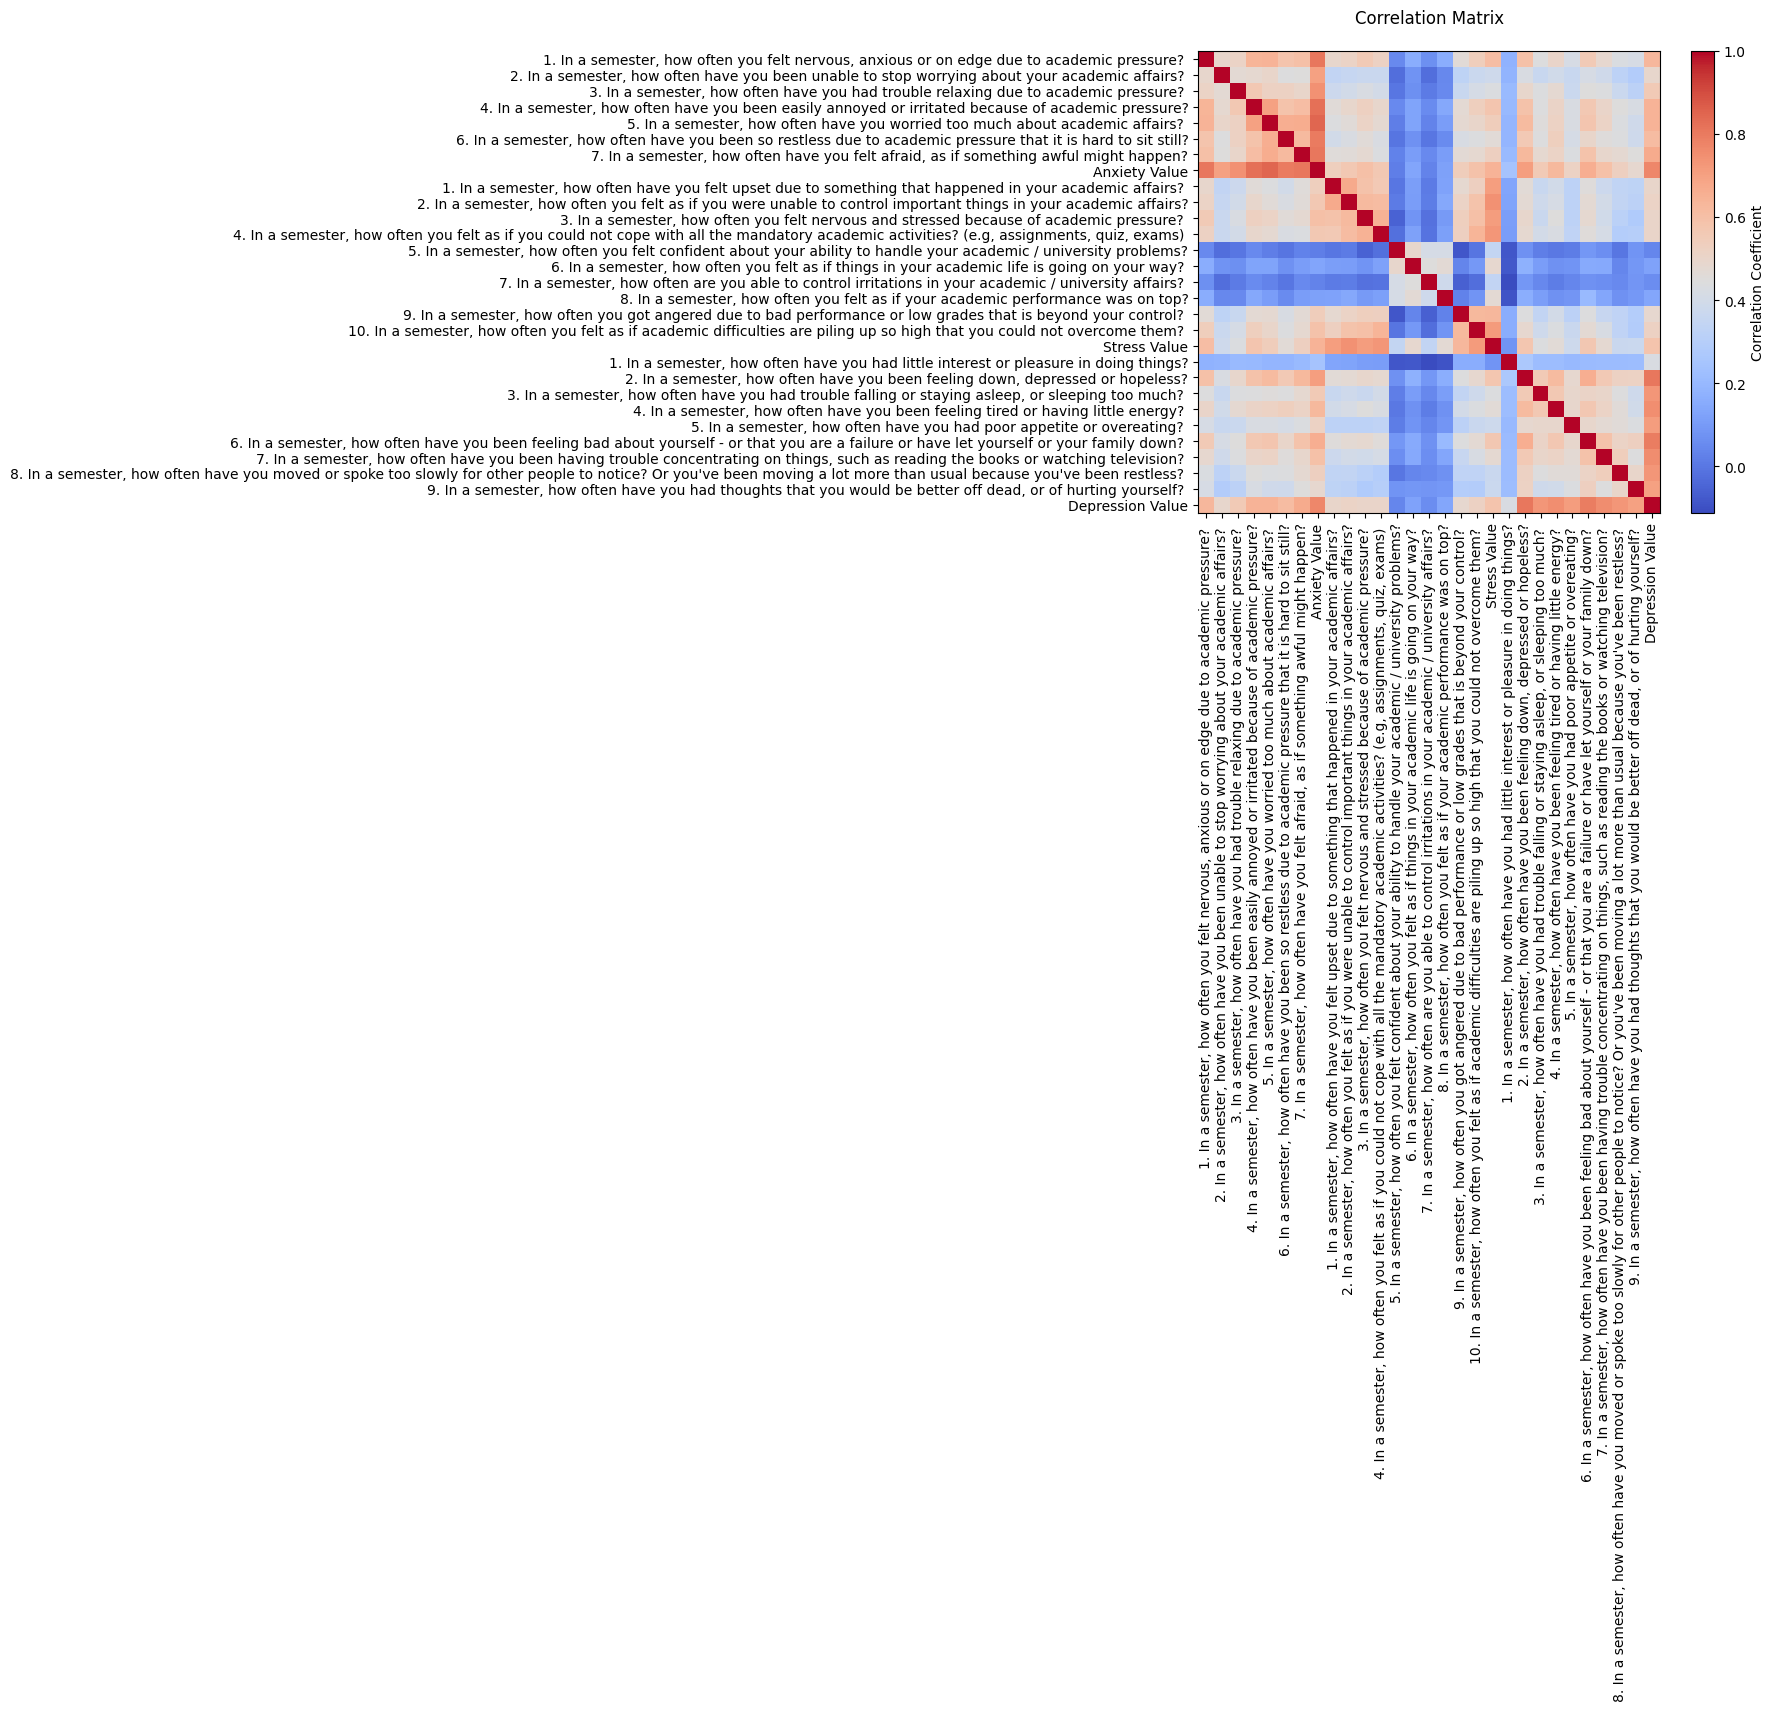

In [24]:
# Calculate the correlation matrix for numerical columns
corr_matrix = df.corr(numeric_only=True)

# Display the correlation values
print("Correlation Matrix:")
print(corr_matrix)

# Set up the figure for visualization
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation Matrix", pad=20)

# Add axis labels
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)

# Add color scale
plt.colorbar(label='Correlation Coefficient')

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
# Whitelist columns to keep
columns_required = [
    '1. Age',
    '2. Gender',
    '5. Academic Year',
    '6. Current CGPA',
    '7. Did you receive a waiver or scholarship at your university?',
    'Anxiety Value',
    'Stress Value',
    "Depression Value",
    'Depression Label'
]

# Drop all other columns not in the whitelist
df = df[columns_required]

df.head(10)

,1. Age,2. Gender,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,Anxiety Value,Stress Value,Depression Value,Depression Label
0,18-22,Female,Fourth Year or Equivalent,2.50 - 2.99,No,10,21,11,Moderate Depression
1,18-22,Male,First Year or Equivalent,3.80 - 4.00,No,9,18,9,Mild Depression
2,18-22,Male,First Year or Equivalent,3.00 - 3.39,No,10,23,16,Moderately Severe Depression
3,18-22,Male,First Year or Equivalent,3.40 - 3.79,No,8,20,9,Mild Depression
4,18-22,Male,First Year or Equivalent,3.40 - 3.79,No,7,20,9,Mild Depression
5,18-22,Male,First Year or Equivalent,3.80 - 4.00,No,14,22,18,Moderately Severe Depression
6,18-22,Male,First Year or Equivalent,3.80 - 4.00,Yes,4,5,3,Minimal Depression
7,18-22,Male,Third Year or Equivalent,2.50 - 2.99,No,16,22,14,Moderate Depression
8,18-22,Female,First Year or Equivalent,3.80 - 4.00,No,14,20,18,Moderately Severe Depression
9,18-22,Female,First Year or Equivalent,3.80 - 4.00,Yes,13,22,19,Moderately Severe Depression


In [26]:
df.isnull().sum()

,0
1. Age,0
2. Gender,0
5. Academic Year,0
6. Current CGPA,0
7. Did you receive a waiver or scholarship at your university?,0
Anxiety Value,0
Stress Value,0
Depression Value,0
Depression Label,0


In [27]:
# Define a mapping from CGPA range categories to approximate numerical values
cgpa_range_to_numeric = {
    'Below 2.50': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
    'Other': np.nan
}

# Apply the mapping to create a new numeric CGPA column
df['CGPA_numeric'] = df['6. Current CGPA'].map(cgpa_range_to_numeric)


In [28]:
# Define a mapping to convert age range categories to representative numeric values
age_range_to_numeric = {
    'Below 18': 17,
    '18-22': 20,
    '23-26': 24.5
}

# Apply the mapping to create a new column with numeric age values
df['Age_numeric'] = df['1. Age'].map(age_range_to_numeric)


In [29]:
# Create a mapping from academic year labels to numeric equivalents
academic_year_to_numeric = {
    'First Year or Equivalent': 1,
    'Second Year or Equivalent': 2,
    'Third Year or Equivalent': 3,
    'Fourth Year or Equivalent': 4
}

# Generate a new column with numeric academic year values
df['Year_numeric'] = df['5. Academic Year'].map(academic_year_to_numeric)


In [30]:
# Map depression level labels to corresponding numeric values for modeling
depression_level_to_numeric = {
    'No Depression': 0,
    'Minimal Depression': 1,
    'Mild Depression': 2,
    'Moderate Depression': 3,
    'Moderately Severe Depression': 4,
    'Severe Depression': 5
}

# Create a new column with numeric depression labels as target values
df['Depression_Target'] = df['Depression Label'].map(depression_level_to_numeric)


In [31]:
# Apply one-hot encoding to categorical columns for gender and scholarship status
df = pd.get_dummies(df, columns=[
    '2. Gender',
    '7. Did you receive a waiver or scholarship at your university?'
])

# Display the first row of the updated DataFrame
df.head(1)


,1. Age,5. Academic Year,6. Current CGPA,Anxiety Value,Stress Value,Depression Value,Depression Label,CGPA_numeric,Age_numeric,Year_numeric,Depression_Target,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,7. Did you receive a waiver or scholarship at your university?_No,7. Did you receive a waiver or scholarship at your university?_Yes
0,18-22,Fourth Year or Equivalent,2.50 - 2.99,10,21,11,Moderate Depression,2.75,20.0,4.0,3,True,False,False,True,False


In [32]:
df.head(10)

,1. Age,5. Academic Year,6. Current CGPA,Anxiety Value,Stress Value,Depression Value,Depression Label,CGPA_numeric,Age_numeric,Year_numeric,Depression_Target,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,7. Did you receive a waiver or scholarship at your university?_No,7. Did you receive a waiver or scholarship at your university?_Yes
0,18-22,Fourth Year or Equivalent,2.50 - 2.99,10,21,11,Moderate Depression,2.75,20.0,4.0,3,True,False,False,True,False
1,18-22,First Year or Equivalent,3.80 - 4.00,9,18,9,Mild Depression,3.90,20.0,1.0,2,False,True,False,True,False
2,18-22,First Year or Equivalent,3.00 - 3.39,10,23,16,Moderately Severe Depression,3.20,20.0,1.0,4,False,True,False,True,False
3,18-22,First Year or Equivalent,3.40 - 3.79,8,20,9,Mild Depression,3.60,20.0,1.0,2,False,True,False,True,False
4,18-22,First Year or Equivalent,3.40 - 3.79,7,20,9,Mild Depression,3.60,20.0,1.0,2,False,True,False,True,False
5,18-22,First Year or Equivalent,3.80 - 4.00,14,22,18,Moderately Severe Depression,3.90,20.0,1.0,4,False,True,False,True,False
6,18-22,First Year or Equivalent,3.80 - 4.00,4,5,3,Minimal Depression,3.90,20.0,1.0,1,False,True,False,False,True
7,18-22,Third Year or Equivalent,2.50 - 2.99,16,22,14,Moderate Depression,2.75,20.0,3.0,3,False,True,False,True,False
8,18-22,First Year or Equivalent,3.80 - 4.00,14,20,18,Moderately Severe Depression,3.90,20.0,1.0,4,True,False,False,True,False
9,18-22,First Year or Equivalent,3.80 - 4.00,13,22,19,Moderately Severe Depression,3.90,20.0,1.0,4,True,False,False,False,True


In [33]:
# Define the list of columns to retain for further analysis
selected_columns = [
    'Depression_Target', 'Anxiety Value', 'Stress Value', 'CGPA_numeric', 'Age_numeric', 'Year_numeric',
    '2. Gender_Female', '2. Gender_Male', '2. Gender_Prefer not to say', 'Depression Value',
    '7. Did you receive a waiver or scholarship at your university?_No',
    '7. Did you receive a waiver or scholarship at your university?_Yes'
]

# Filter the DataFrame to keep only the selected columns
df = df[selected_columns]


In [37]:
df.columns

Index(['Depression_Target', 'Anxiety Value', 'Stress Value', 'CGPA_numeric',
       'Age_numeric', 'Year_numeric', '2. Gender_Female', '2. Gender_Male',
       '2. Gender_Prefer not to say', 'Depression Value',
       '7. Did you receive a waiver or scholarship at your university?_No',
       '7. Did you receive a waiver or scholarship at your university?_Yes'],
      dtype='object')

In [38]:
df.drop_duplicates()
df.shape

(1977, 12)

In [39]:
df.isnull().sum()

,0
Depression_Target,0
Anxiety Value,0
Stress Value,0
CGPA_numeric,168
Age_numeric,27
Year_numeric,71
2. Gender_Female,0
2. Gender_Male,0
2. Gender_Prefer not to say,0
Depression Value,0


In [40]:
# Identify all numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values in numerical columns with their respective column means
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [41]:
df.isnull().sum()

,0
Depression_Target,0
Anxiety Value,0
Stress Value,0
CGPA_numeric,0
Age_numeric,0
Year_numeric,0
2. Gender_Female,0
2. Gender_Male,0
2. Gender_Prefer not to say,0
Depression Value,0


In [42]:
df.drop_duplicates()
df.shape

(1977, 12)

Class Distribution Summary:
                               Depression_Level  Count  Percentage
Depression_Target                                                 
0                                 No Depression     44        2.23
1                            Minimal Depression     93        4.70
2                               Mild Depression    408       20.64
3                           Moderate Depression    449       22.71
4                  Moderately Severe Depression    495       25.04
5                             Severe Depression    488       24.68


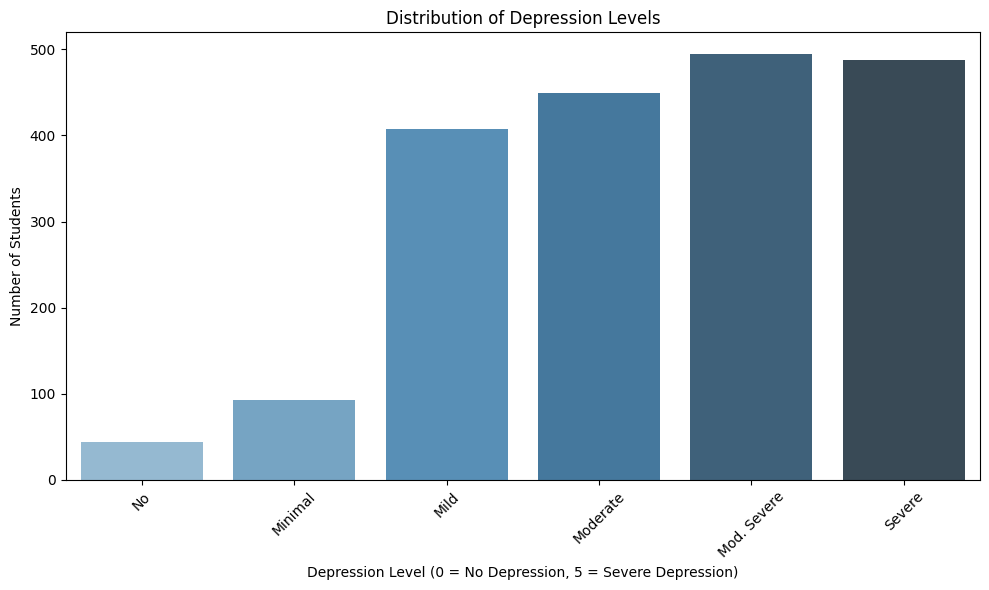

Final DataFrame Shape: (1977, 12)


In [43]:
# Define depression label mapping for reference
depression_labels = [
    'No Depression',
    'Minimal Depression',
    'Mild Depression',
    'Moderate Depression',
    'Moderately Severe Depression',
    'Severe Depression'
]

# Step 1: Calculate class counts and percentages
depression_counts = df['Depression_Target'].value_counts().sort_index()
depression_percentages = (depression_counts / len(df) * 100).round(2)

# Step 2: Create a DataFrame summarizing the distribution
depression_distribution = pd.DataFrame({
    'Depression_Level': depression_labels,
    'Count': depression_counts.values,
    'Percentage': depression_percentages.values
}, index=depression_counts.index)

# Step 3: Display class distribution
print("Class Distribution Summary:")
print(depression_distribution)

# Step 4: Plot the class distribution as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette="Blues_d")

plt.title('Distribution of Depression Levels')
plt.xlabel('Depression Level (0 = No Depression, 5 = Severe Depression)')
plt.ylabel('Number of Students')
plt.xticks(ticks=range(6), labels=['No', 'Minimal', 'Mild', 'Moderate', 'Mod. Severe', 'Severe'], rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Output the shape of the final dataset
print("Final DataFrame Shape:", df.shape)

In [44]:
df.head(10)

,Depression_Target,Anxiety Value,Stress Value,CGPA_numeric,Age_numeric,Year_numeric,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,Depression Value,7. Did you receive a waiver or scholarship at your university?_No,7. Did you receive a waiver or scholarship at your university?_Yes
0,3,10,21,2.75,20.0,4.0,True,False,False,11,True,False
1,2,9,18,3.90,20.0,1.0,False,True,False,9,True,False
2,4,10,23,3.20,20.0,1.0,False,True,False,16,True,False
3,2,8,20,3.60,20.0,1.0,False,True,False,9,True,False
4,2,7,20,3.60,20.0,1.0,False,True,False,9,True,False
5,4,14,22,3.90,20.0,1.0,False,True,False,18,True,False
6,1,4,5,3.90,20.0,1.0,False,True,False,3,False,True
7,3,16,22,2.75,20.0,3.0,False,True,False,14,True,False
8,4,14,20,3.90,20.0,1.0,True,False,False,18,True,False
9,4,13,22,3.90,20.0,1.0,True,False,False,19,False,True


In [45]:
df.isnull().sum()

,0
Depression_Target,0
Anxiety Value,0
Stress Value,0
CGPA_numeric,0
Age_numeric,0
Year_numeric,0
2. Gender_Female,0
2. Gender_Male,0
2. Gender_Prefer not to say,0
Depression Value,0


In [49]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Set random seed
np.random.seed(42)

#  Dataset Summary
print("Initial DataFrame Shape:", df.shape)

print("\nClass Counts (Depression Levels):")
print(df['Depression_Target'].value_counts().sort_index())

print("\nClass Percentages:")
print((df['Depression_Target'].value_counts(normalize=True).sort_index() * 100).round(2))


# Feature & Target Split
X = df.drop('Depression_Target', axis=1)
y = df['Depression_Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Handle Imbalance with SMOTE
print("\nBefore SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", Counter(y_train_smote))


#  Gaussian Noise Function for Augmentation
def add_gaussian_noise(X, noise_factor=0.1):
    noise = np.random.normal(0, noise_factor, X.shape)
    return X + noise

X_train_noisy = add_gaussian_noise(X_train_smote)
print("\nAdded Gaussian noise to training set.")


# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n{'-'*60}\nEvaluating: {model_name}\n{'-'*60}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Weighted Precision: {prec:.4f}")
    print(f"Weighted Recall: {rec:.4f}")
    print(f"Weighted F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(6)],
                yticklabels=[f'Class {i}' for i in range(6)])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Feature Importance (if available)
    if hasattr(model, 'feature_importances_'):
        importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print("\nFeature Importance:")
        print(importance)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance)
        plt.title(f'Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()

    return {
        'model': model,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }


# Hyperparameter Tuning for XGBoost
print("\n\nStarting XGBoost Hyperparameter Tuning...")

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_noisy, y_train_smote)

# Best model info
print("\nBest Parameters Found:", grid_search.best_params_)
print(f"Best Cross-Validated F1 Score: {grid_search.best_score_:.4f}")


Initial DataFrame Shape: (1977, 12)

Class Counts (Depression Levels):
Depression_Target
0     44
1     93
2    408
3    449
4    495
5    488
Name: count, dtype: int64

Class Percentages:
Depression_Target
0     2.23
1     4.70
2    20.64
3    22.71
4    25.04
5    24.68
Name: proportion, dtype: float64

Before SMOTE: Counter({4: 396, 5: 390, 3: 359, 2: 326, 1: 75, 0: 35})
After SMOTE: Counter({5: 396, 4: 396, 2: 396, 0: 396, 1: 396, 3: 396})

Added Gaussian noise to training set.


Starting XGBoost Hyperparameter Tuning...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters Found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validated F1 Score: 0.9179



------------------------------------------------------------
Evaluating: Logistic Regression
------------------------------------------------------------
Accuracy: 0.9343
Weighted Precision: 0.9365
Weighted Recall: 0.9343
Weighted F1 Score: 0.9348

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.78      0.78      0.78        18
           2       0.90      0.93      0.92        82
           3       0.94      0.88      0.91        90
           4       0.96      0.97      0.96        99
           5       0.99      0.99      0.99        98

    accuracy                           0.93       396
   macro avg       0.87      0.91      0.89       396
weighted avg       0.94      0.93      0.93       396



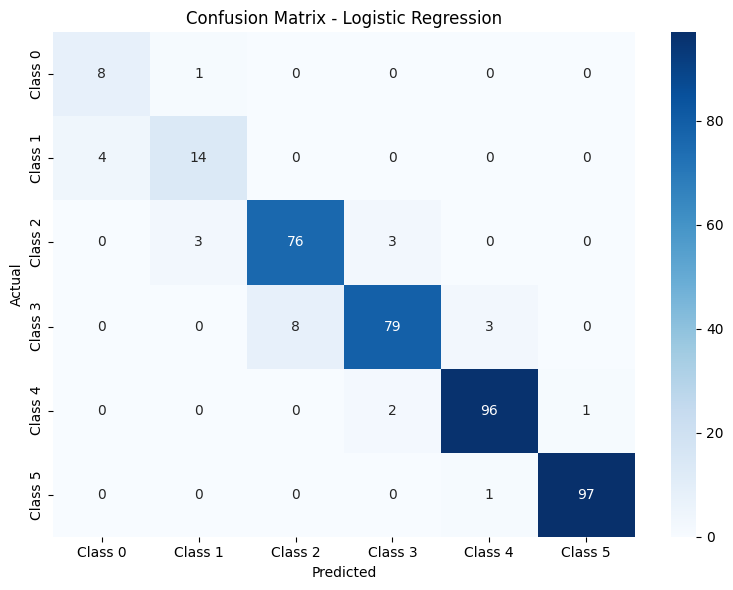


------------------------------------------------------------
Evaluating: XGBoost
------------------------------------------------------------
Accuracy: 0.9444
Weighted Precision: 0.9499
Weighted Recall: 0.9444
Weighted F1 Score: 0.9449

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.74      0.78      0.76        18
           2       0.96      0.95      0.96        82
           3       1.00      0.86      0.92        90
           4       0.91      1.00      0.95        99
           5       1.00      1.00      1.00        98

    accuracy                           0.94       396
   macro avg       0.88      0.91      0.89       396
weighted avg       0.95      0.94      0.94       396



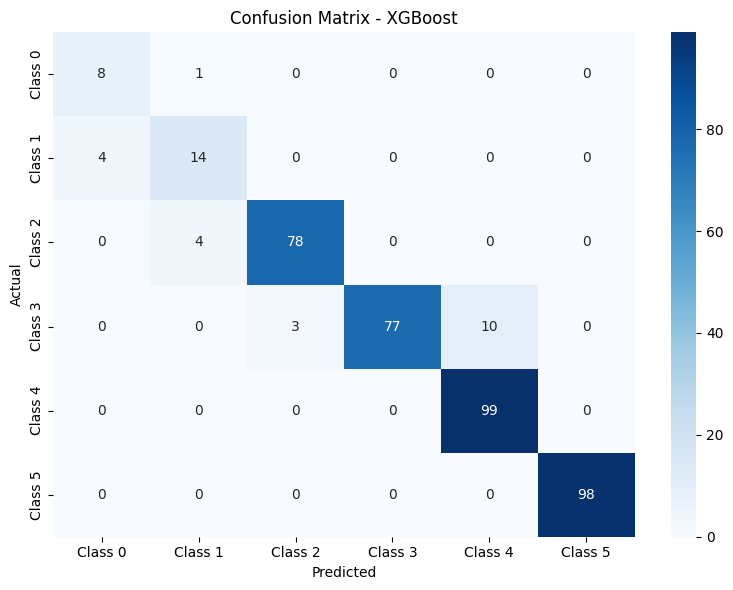


Feature Importance:
                                              Feature  Importance
8                                    Depression Value    0.760545
4                                        Year_numeric    0.030234
1                                        Stress Value    0.028990
0                                       Anxiety Value    0.028949
2                                        CGPA_numeric    0.027671
9   7. Did you receive a waiver or scholarship at ...    0.025811
3                                         Age_numeric    0.022618
7                         2. Gender_Prefer not to say    0.022502
6                                      2. Gender_Male    0.019743
5                                    2. Gender_Female    0.017596
10  7. Did you receive a waiver or scholarship at ...    0.015341


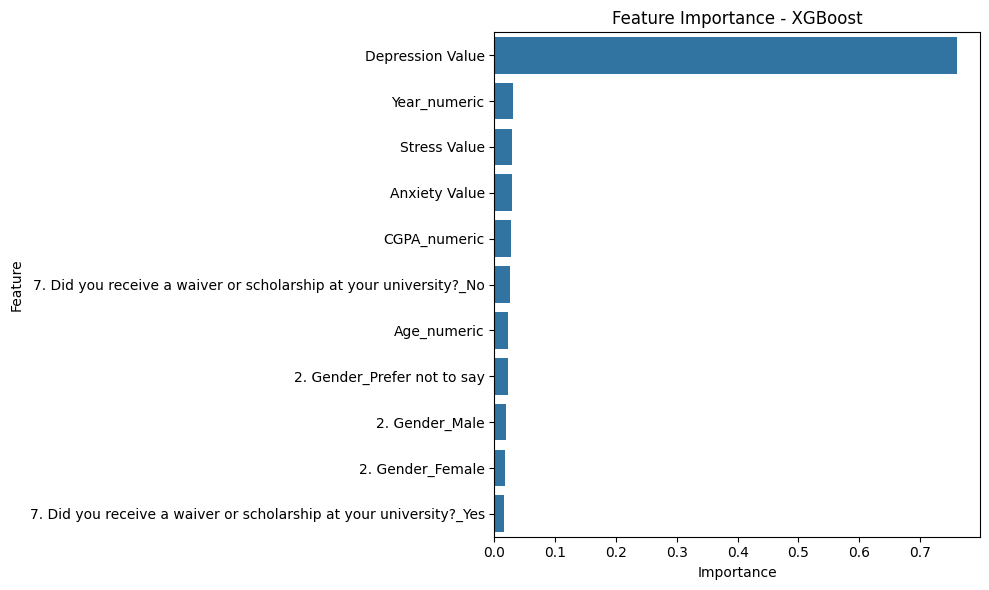


------------------------------------------------------------
Evaluating: Support Vector Machine
------------------------------------------------------------
Accuracy: 0.8763
Weighted Precision: 0.8796
Weighted Recall: 0.8763
Weighted F1 Score: 0.8776

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.57      0.67      0.62        18
           2       0.85      0.87      0.86        82
           3       0.88      0.86      0.87        90
           4       0.90      0.91      0.90        99
           5       0.97      0.93      0.95        98

    accuracy                           0.88       396
   macro avg       0.80      0.82      0.81       396
weighted avg       0.88      0.88      0.88       396



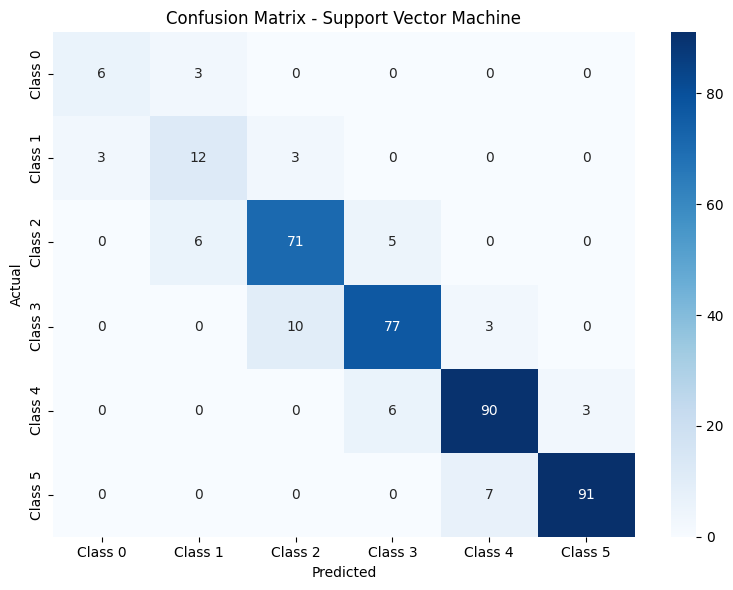


------------------------------------------------------------
Evaluating: K-Nearest Neighbors
------------------------------------------------------------
Accuracy: 0.6742
Weighted Precision: 0.6927
Weighted Recall: 0.6742
Weighted F1 Score: 0.6803

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.38      0.67      0.48        18
           2       0.68      0.62      0.65        82
           3       0.60      0.62      0.61        90
           4       0.67      0.69      0.68        99
           5       0.89      0.78      0.83        98

    accuracy                           0.67       396
   macro avg       0.61      0.64      0.62       396
weighted avg       0.69      0.67      0.68       396



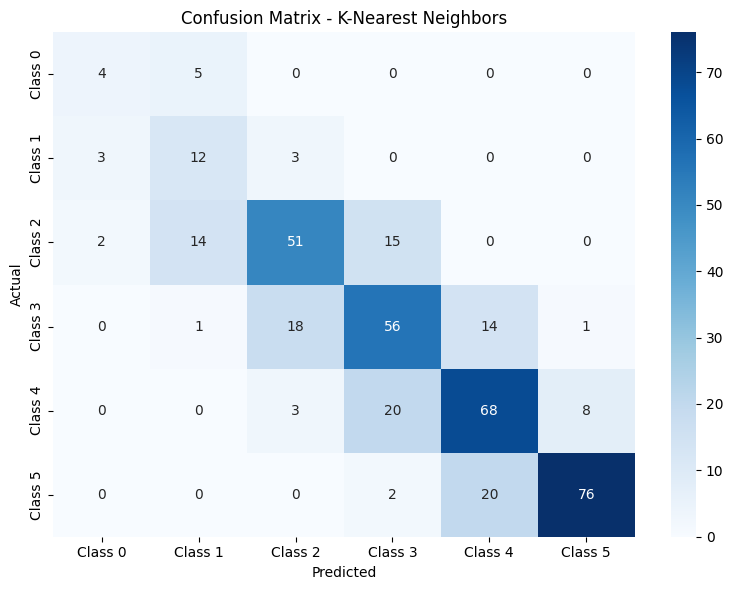


------------------------------------------------------------
Evaluating: Neural Network (MLP)
------------------------------------------------------------
Accuracy: 0.9217
Weighted Precision: 0.9225
Weighted Recall: 0.9217
Weighted F1 Score: 0.9214

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.87      0.72      0.79        18
           2       0.92      0.93      0.92        82
           3       0.91      0.88      0.89        90
           4       0.90      0.96      0.93        99
           5       0.99      0.96      0.97        98

    accuracy                           0.92       396
   macro avg       0.90      0.89      0.89       396
weighted avg       0.92      0.92      0.92       396



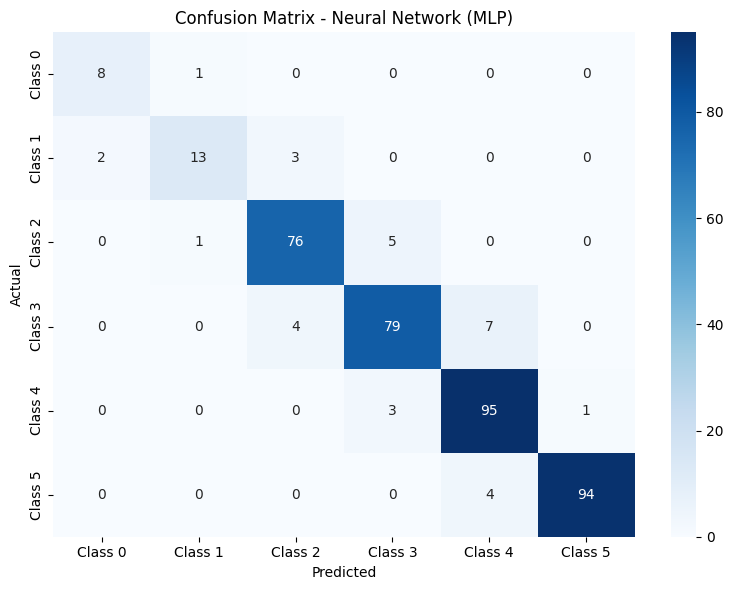



Model Performance Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
1                 XGBoost  0.944444   0.949857  0.944444  0.944929
0     Logistic Regression  0.934343   0.936549  0.934343  0.934806
4    Neural Network (MLP)  0.921717   0.922483  0.921717  0.921354
2  Support Vector Machine  0.876263   0.879590  0.876263  0.877602
3     K-Nearest Neighbors  0.674242   0.692745  0.674242  0.680252


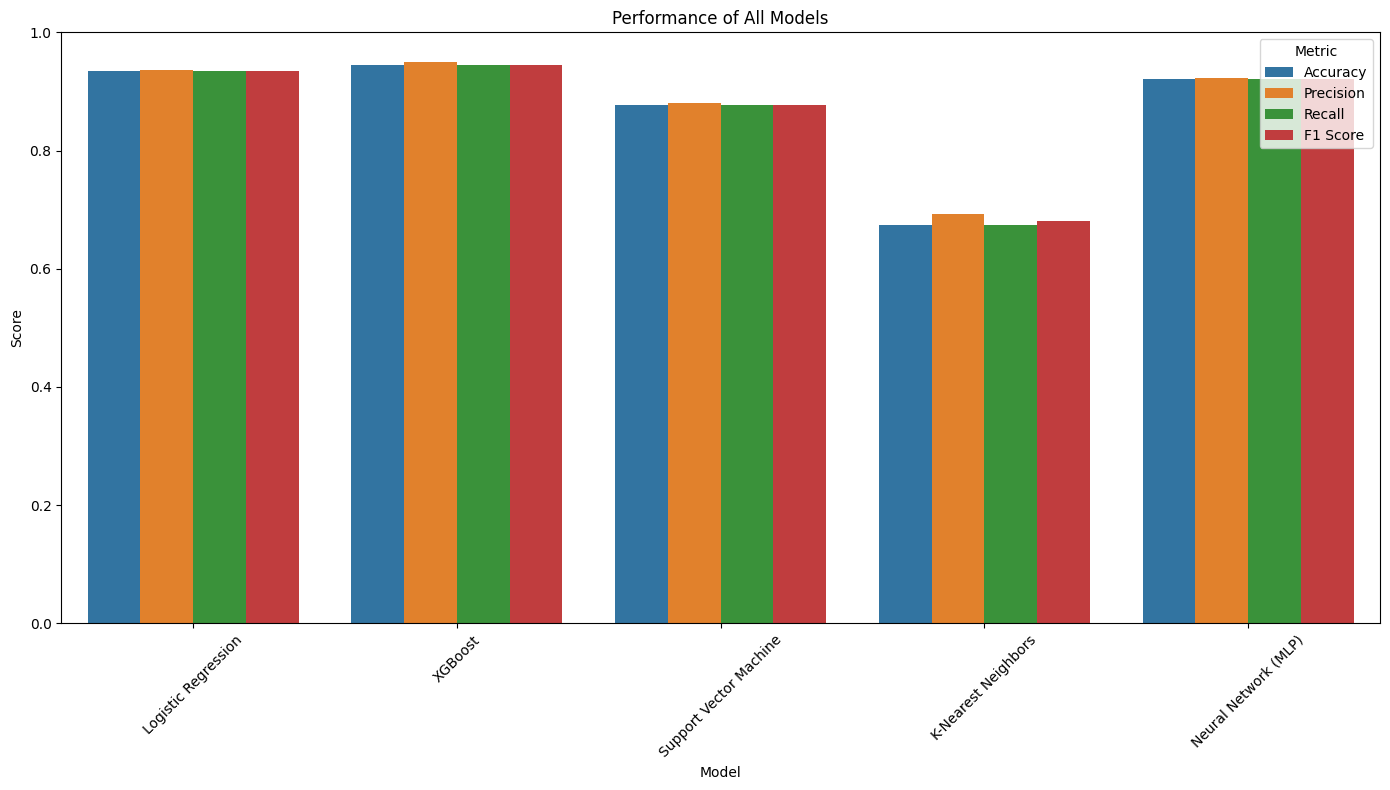

In [51]:
#Initialize and Train Multiple Models

# Define a list of classifiers and their names
classifiers = [
    ("Logistic Regression", LogisticRegression(
        max_iter=1000, C=1.0, solver='lbfgs',
        multi_class='multinomial', random_state=42)),

    ("XGBoost", XGBClassifier(
        n_estimators=100, learning_rate=0.1,
        max_depth=6, random_state=42)),

    ("Support Vector Machine", SVC(
        C=1.0, kernel='rbf', gamma='scale', random_state=42)),

    ("K-Nearest Neighbors", KNeighborsClassifier(
        n_neighbors=5)),

    ("Neural Network (MLP)", MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu', solver='adam',
        max_iter=300, random_state=42))
]

# Store evaluation results
evaluation_results = []

# Evaluate each model
for model_name, model in classifiers:
    results = evaluate_model(
        model, X_train_noisy, y_train_smote,
        X_test_scaled, y_test, model_name
    )
    results['Model'] = model_name
    evaluation_results.append(results)


#Compare Model Performance

# Convert results into a DataFrame
comparison_df = pd.DataFrame(evaluation_results)

# Reorder columns
comparison_df = comparison_df[['Model', 'accuracy', 'precision', 'recall', 'f1']]

# Rename for clarity
comparison_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

# Display sorted by F1 Score
print("\n\nModel Performance Comparison:")
print(comparison_df.sort_values('F1 Score', ascending=False))


# Visualize Model Performance
plt.figure(figsize=(14, 8))

# Melt DataFrame for Seaborn
melted = pd.melt(comparison_df,
                 id_vars='Model',
                 value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                 var_name='Metric',
                 value_name='Score')

sns.barplot(data=melted, x='Model', y='Score', hue='Metric')

plt.title("Performance of All Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
